In [151]:
import pandas as pd
import numpy as np
import geopandas
import seaborn as sns
%matplotlib inline

In [86]:
def fix_col_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
    return(df)

## Reading and Preparing Zones data

In [2]:
zones_df = pd.read_csv('/local/tarciso/data/pesquisa-od-ctba/tables/Zoneamento_Modelacao.csv')

In [3]:
zones_df

,OBJECTID,Shape,NM_MUNICIP,Codigo_Zoneamento,Codigo_Modelacao,Codigo_Macrozona,Shape_Length,Shape_Area
0,1,,PR-092,1201,1201,NaN,0.148748,0.001755
1,2,,BR-476,1210,1210,NaN,0.149229,0.001765
2,3,,PR-510,1212,1212,NaN,0.149119,0.001763
3,4,,BR-277/BR-376,1213,1213,NaN,0.149066,0.001762
4,5,,BR-476,1202,1202,NaN,0.148767,0.001755
5,6,,BR-116,1203,1203,NaN,0.148811,0.001756
6,7,,BR-410,1204,1204,NaN,0.148981,0.001760
7,8,,BR-277,1205,1205,NaN,0.149130,0.001763
8,9,,BR-376,1206,1206,NaN,0.149278,0.001766
9,10,,PR-419,1207,1207,NaN,0.149410,0.001769


In [87]:
zones_df = fix_col_names(zones_df)

In [94]:
zones_clean = zones_df.filter(['codigo_zoneamento','codigo_macrozona','nm_municip']).drop_duplicates() \
                    .rename(index=str, columns={'codigo_zoneamento':'cod_zona','codigo_macrozona':'cod_macrozona','nm_municip':'municipio'})

In [95]:
len(zones_clean)

196

In [97]:
zones_clean.sort_values('cod_zona')

,cod_zona,cod_macrozona,municipio
15,101,NaN,ALMIRANTE TAMANDARÉ
19,102,NaN,ALMIRANTE TAMANDARÉ
21,103,NaN,ALMIRANTE TAMANDARÉ
24,104,NaN,ALMIRANTE TAMANDARÉ
27,111,NaN,ARAUCÁRIA
30,112,NaN,ARAUCÁRIA
32,113,NaN,ARAUCÁRIA
39,121,NaN,BOCAIÚVA DO SUL
41,131,NaN,CAMPINA GRANDE DO SUL
43,132,NaN,CAMPINA GRANDE DO SUL


In [98]:
zones_clean.columns

Index(['cod_zona', 'cod_macrozona', 'municipio'], dtype='object')

## Reading and Preparing Trips data

In [138]:
desloc_df = pd.read_excel('/local/tarciso/data/pesquisa-od-ctba/dados-extraidos/Deslocamentos.xlsx')

In [101]:
desloc_df

,MUNICIPIO DA ENTREVISTA,ZONA DA ENTREVISTA,PESSOA,SEXO,IDADE,MUNICIPIO DE ORIGEM,ZONA DE ORIGEM,COD ORIGEM,MOT ORIGEM,HORA ORIGEM,MUNICIPIO DESTINO,ZONA DESTINO,COD DESTINO,MOT DESTINO,HORA DESTINO,COD TRANSPORTE,TRANSPORTE
0,CURITIBA,1012,6488,Masculino,23.0,CURITIBA,1028,12,Trabalho,17:50,CURITIBA,1011,12,Trabalho,18:00,13,Bicicleta
1,CURITIBA,833,836,Masculino,51.0,CURITIBA,301,12,Trabalho,7:50,CURITIBA,861,12,Trabalho,8:20,6,Dirigindo automovel
2,CURITIBA,941,3815,Masculino,21.0,CURITIBA,681,12,Trabalho,6:11,CURITIBA,1025,12,Trabalho,6:30,6,Dirigindo automovel
3,CURITIBA,833,836,Masculino,51.0,CURITIBA,861,12,Trabalho,17:30,CURITIBA,301,12,Trabalho,17:48,6,Dirigindo automovel
4,SAO JOSE DOS PINHAIS,252,2926,Masculino,49.0,SAO JOSE DOS PINHAIS,252,12,Trabalho,5:00,SAO JOSE DOS PINHAIS,257,12,Trabalho,5:50,4,Onibus fretado
5,SAO JOSE DOS PINHAIS,252,2926,Masculino,49.0,SAO JOSE DOS PINHAIS,252,12,Trabalho,5:00,SAO JOSE DOS PINHAIS,257,12,Trabalho,5:50,4,Onibus fretado
6,CURITIBA,913,9012,Masculino,43.0,CURITIBA,1028,12,Trabalho,19:00,CURITIBA,913,12,Trabalho,19:50,6,Dirigindo automovel
7,CURITIBA,721,10981,Masculino,53.0,CURITIBA,431,12,Trabalho,14:20,SAO JOSE DOS PINHAIS,253,12,Trabalho,14:50,6,Dirigindo automovel
8,ARAUCARIA,113,8765,Masculino,53.0,CURITIBA,301,12,Trabalho,6:50,ARAUCARIA,112,12,Trabalho,7:20,6,Dirigindo automovel
9,CURITIBA,771,5501,Masculino,27.0,CURITIBA,771,12,Trabalho,7:25,CURITIBA,901,12,Trabalho,7:30,6,Dirigindo automovel


In [104]:
desloc_df = fix_col_names(desloc_df)

In [105]:
desloc_df.head()

,municipio_da_entrevista,zona_da_entrevista,pessoa,sexo,idade,municipio_de_origem,zona_de_origem,cod_origem,mot_origem,hora_origem,municipio_destino,zona_destino,cod_destino,mot_destino,hora_destino,cod_transporte,transporte
0,CURITIBA,1012,6488,Masculino,23.0,CURITIBA,1028,12,Trabalho,17:50,CURITIBA,1011,12,Trabalho,18:00,13,Bicicleta
1,CURITIBA,833,836,Masculino,51.0,CURITIBA,301,12,Trabalho,7:50,CURITIBA,861,12,Trabalho,8:20,6,Dirigindo automovel
2,CURITIBA,941,3815,Masculino,21.0,CURITIBA,681,12,Trabalho,6:11,CURITIBA,1025,12,Trabalho,6:30,6,Dirigindo automovel
3,CURITIBA,833,836,Masculino,51.0,CURITIBA,861,12,Trabalho,17:30,CURITIBA,301,12,Trabalho,17:48,6,Dirigindo automovel
4,SAO JOSE DOS PINHAIS,252,2926,Masculino,49.0,SAO JOSE DOS PINHAIS,252,12,Trabalho,5:00,SAO JOSE DOS PINHAIS,257,12,Trabalho,5:50,4,Onibus fretado


## Joining Trips and Zones data based on origin and destination zone code

In [107]:
np.sort(desloc_df['zona_de_origem'].unique())

array([ 101,  102,  103,  104,  111,  112,  113,  121,  131,  132,  141,
        142,  143,  151,  152,  161,  162,  163,  164,  165,  166,  167,
        168,  171,  181,  182,  183,  184,  191,  201,  211,  212,  213,
        214,  221,  222,  231,  241,  251,  252,  253,  254,  255,  256,
        257,  258,  301,  302,  303,  311,  321,  331,  341,  351,  361,
        362,  371,  372,  373,  374,  381,  391,  392,  401,  411,  421,
        431,  441,  451,  461,  471,  481,  482,  491,  492,  493,  494,
        495,  501,  511,  521,  531,  541,  551,  552,  561,  571,  581,
        591,  592,  601,  602,  611,  612,  621,  622,  623,  631,  632,
        641,  642,  651,  661,  671,  681,  682,  683,  691,  692,  701,
        711,  712,  721,  731,  741,  751,  761,  771,  772,  781,  791,
        801,  802,  811,  821,  822,  831,  832,  833,  834,  841,  842,
        843,  851,  852,  853,  861,  871,  872,  881,  891,  901,  902,
        903,  911,  912,  913,  921,  922,  923,  9

In [109]:
np.sort(zones_clean['cod_zona'].unique())

array([ 101,  102,  103,  104,  111,  112,  113,  121,  131,  132,  141,
        142,  143,  151,  152,  161,  162,  163,  164,  165,  166,  167,
        168,  171,  181,  182,  183,  184,  191,  201,  211,  212,  213,
        214,  221,  222,  231,  241,  251,  252,  253,  254,  255,  256,
        257,  258,  301,  302,  303,  311,  321,  331,  341,  351,  361,
        362,  371,  372,  373,  374,  381,  391,  392,  401,  411,  421,
        431,  441,  451,  461,  471,  481,  482,  491,  492,  493,  494,
        495,  501,  511,  521,  531,  541,  551,  552,  561,  571,  581,
        591,  592,  601,  602,  611,  621,  622,  623,  631,  632,  641,
        642,  651,  661,  671,  681,  682,  683,  691,  692,  701,  711,
        712,  721,  731,  741,  751,  761,  771,  781,  791,  801,  802,
        811,  821,  822,  831,  832,  833,  834,  841,  842,  843,  851,
        852,  853,  861,  871,  872,  881,  891,  901,  902,  903,  911,
        912,  913,  921,  922,  923,  924,  925,  9

In [110]:
len(zones_clean['cod_zona'].unique())

196

In [111]:
trips_zones = desloc_df.merge(zones_clean.add_suffix('_o'), left_on='zona_de_origem', right_on='cod_zona_o') \
        .merge(zones_clean.add_suffix('_d'), left_on='zona_destino', right_on='cod_zona_d')

In [112]:
len(trips_zones)

71922

In [113]:
trips_zones

,municipio_da_entrevista,zona_da_entrevista,pessoa,sexo,idade,municipio_de_origem,zona_de_origem,cod_origem,mot_origem,hora_origem,...,mot_destino,hora_destino,cod_transporte,transporte,cod_zona_o,cod_macrozona_o,municipio_o,cod_zona_d,cod_macrozona_d,municipio_d
0,CURITIBA,1012,6488,Masculino,23.0,CURITIBA,1028,12,Trabalho,17:50,...,Trabalho,18:00,13,Bicicleta,1028,8.0,CURITIBA,1011,10.0,CURITIBA
1,CURITIBA,1028,7632,Masculino,51.0,CURITIBA,1028,9,Residencia,15:30,...,Trabalho,15:40,6,Dirigindo automovel,1028,8.0,CURITIBA,1011,10.0,CURITIBA
2,CURITIBA,1028,9285,Feminino,30.0,CURITIBA,1028,9,Residencia,12:55,...,Escola/educacao,13:00,6,Dirigindo automovel,1028,8.0,CURITIBA,1011,10.0,CURITIBA
3,CURITIBA,1028,17752,Feminino,10.0,CURITIBA,1028,9,Residencia,12:55,...,Escola/educacao,13:00,7,Passageiro de auto,1028,8.0,CURITIBA,1011,10.0,CURITIBA
4,CURITIBA,1028,9285,Feminino,30.0,CURITIBA,1028,9,Residencia,17:15,...,Escola/educacao,17:20,6,Dirigindo automovel,1028,8.0,CURITIBA,1011,10.0,CURITIBA
5,CURITIBA,1028,17906,Feminino,24.0,CURITIBA,1028,9,Residencia,11:40,...,Escola/educacao,11:45,14,A pe,1028,8.0,CURITIBA,1011,10.0,CURITIBA
6,CURITIBA,1028,17906,Feminino,24.0,CURITIBA,1028,9,Residencia,7:45,...,Escola/educacao,7:50,14,A pe,1028,8.0,CURITIBA,1011,10.0,CURITIBA
7,CURITIBA,1028,13365,Feminino,6.0,CURITIBA,1028,9,Residencia,7:45,...,Escola/educacao,7:50,6,Dirigindo automovel,1028,8.0,CURITIBA,1011,10.0,CURITIBA
8,CURITIBA,1011,26557,Masculino,31.0,CURITIBA,1028,12,Trabalho,22:00,...,Residencia,22:45,1,Onibus municipio de Curitiba,1028,8.0,CURITIBA,1011,10.0,CURITIBA
9,CURITIBA,1011,12395,Masculino,33.0,CURITIBA,1028,12,Trabalho,15:00,...,Residencia,15:30,1,Onibus municipio de Curitiba,1028,8.0,CURITIBA,1011,10.0,CURITIBA


In [114]:
trips_zones.dtypes

municipio_da_entrevista     object
zona_da_entrevista           int64
pessoa                       int64
sexo                        object
idade                      float64
municipio_de_origem         object
zona_de_origem               int64
cod_origem                   int64
mot_origem                  object
hora_origem                 object
municipio_destino           object
zona_destino                 int64
cod_destino                  int64
mot_destino                 object
hora_destino                object
cod_transporte               int64
transporte                  object
cod_zona_o                   int64
cod_macrozona_o            float64
municipio_o                 object
cod_zona_d                   int64
cod_macrozona_d            float64
municipio_d                 object
dtype: object

In [122]:
trips_zones_clean = trips_zones.filter(['pessoa','sexo','idade','cod_transporte','transporte','zona_de_origem',
                                        'cod_macrozona_o','municipio_o','mot_origem','hora_origem','zona_destino',
                                        'cod_macrozona_d','municipio_d','mot_destino','hora_destino']) \
                                .sort_values('pessoa')

trips_zones_clean.columns = trips_zones_clean.columns.str.replace('de_origem','o') \
                                                        .str.replace('origem','o') \
                                                        .str.replace('destino','d') \
                                                        .str.replace('transporte','transp') \
                                

In [123]:
trips_zones_clean

,pessoa,sexo,idade,cod_transp,transp,zona_o,cod_macrozona_o,municipio_o,mot_o,hora_o,zona_d,cod_macrozona_d,municipio_d,mot_d,hora_d
25871,1,Feminino,10.0,7,Passageiro de auto,691,2.0,CURITIBA,Residencia,7:10,681,7.0,CURITIBA,Escola/educacao,7:30
26670,1,Feminino,10.0,7,Passageiro de auto,681,7.0,CURITIBA,Escola/educacao,17:30,691,2.0,CURITIBA,Residencia,17:55
8774,2,Masculino,16.0,7,Passageiro de auto,381,1.0,CURITIBA,Medico/dentista/saude,22:20,831,6.0,CURITIBA,Residencia,22:40
14507,2,Masculino,16.0,7,Passageiro de auto,831,6.0,CURITIBA,Residencia,20:00,381,1.0,CURITIBA,Medico/dentista/saude,20:15
15562,3,Feminino,62.0,3,Onibus metropolitano,111,NaN,ARAUCÁRIA,Residencia,13:30,301,1.0,CURITIBA,Assuntos pessoais,14:20
69969,3,Feminino,62.0,8,Tßxi,301,1.0,CURITIBA,Assuntos pessoais,17:00,111,NaN,ARAUCÁRIA,Residencia,17:40
67944,4,Feminino,10.0,14,A pe,131,NaN,CAMPINA GRANDE DO SUL,Residencia,7:00,131,NaN,CAMPINA GRANDE DO SUL,Escola/educacao,7:20
68091,4,Feminino,10.0,14,A pe,131,NaN,CAMPINA GRANDE DO SUL,Escola/educacao,17:10,131,NaN,CAMPINA GRANDE DO SUL,Residencia,17:30
49003,5,Feminino,15.0,14,A pe,431,1.0,CURITIBA,Escola/educacao,12:00,431,1.0,CURITIBA,Residencia,12:10
48977,5,Feminino,15.0,14,A pe,431,1.0,CURITIBA,Residencia,7:00,431,1.0,CURITIBA,Escola/educacao,7:10


## Selecting only trips performed by municipal or metropolitan bus

In [128]:
trips_zones_clean[['cod_transp','transp']].drop_duplicates().sort_values('cod_transp')

,cod_transp,transp
67184,0,0
7859,1,Onibus municipio de Curitiba
34720,2,Onibus outros municipio
15562,3,Onibus metropolitano
59053,4,Onibus fretado
57537,5,Escolar
36656,6,Dirigindo automovel
25871,7,Passageiro de auto
69969,8,Tßxi
69003,9,Micro¶nibus/van municipio Curitiba


In [132]:
trips_zones_clean.cod_transp.value_counts()

6     23258
14    16864
1     11871
7      9560
5      2886
12     1937
13     1490
3      1473
2       970
4       832
15      360
8       335
10       53
9        21
0         8
11        4
Name: cod_transp, dtype: int64

In [140]:
bus_trips_zones = trips_zones_clean[np.logical_or(trips_zones_clean['cod_transp'] == 1,trips_zones_clean['cod_transp'] == 3)]

In [141]:
bus_trips_zones

,pessoa,sexo,idade,cod_transp,transp,zona_o,cod_macrozona_o,municipio_o,mot_o,hora_o,zona_d,cod_macrozona_d,municipio_d,mot_d,hora_d
15562,3,Feminino,62.0,3,Onibus metropolitano,111,NaN,ARAUCÁRIA,Residencia,13:30,301,1.0,CURITIBA,Assuntos pessoais,14:20
7859,6,Masculino,22.0,1,Onibus municipio de Curitiba,451,1.0,CURITIBA,Residencia,18:00,302,1.0,CURITIBA,Escola/educacao,18:50
10471,6,Masculino,22.0,1,Onibus municipio de Curitiba,302,1.0,CURITIBA,Escola/educacao,22:30,451,1.0,CURITIBA,Residencia,23:00
22169,15,Feminino,24.0,1,Onibus municipio de Curitiba,495,3.0,CURITIBA,Residencia,12:30,303,1.0,CURITIBA,Compras,13:00
63747,15,Feminino,24.0,1,Onibus municipio de Curitiba,303,1.0,CURITIBA,Compras,17:20,495,3.0,CURITIBA,Residencia,18:00
26439,16,Masculino,56.0,1,Onibus municipio de Curitiba,631,5.0,CURITIBA,Trabalho,16:00,781,5.0,CURITIBA,Residencia,17:05
44665,16,Masculino,56.0,1,Onibus municipio de Curitiba,781,5.0,CURITIBA,Residencia,6:30,631,5.0,CURITIBA,Trabalho,7:10
15762,19,Feminino,45.0,1,Onibus municipio de Curitiba,927,9.0,CURITIBA,Residencia,7:50,301,1.0,CURITIBA,Trabalho,8:50
33723,19,Feminino,45.0,1,Onibus municipio de Curitiba,301,1.0,CURITIBA,Trabalho,19:00,927,9.0,CURITIBA,Residencia,20:20
33709,25,Masculino,18.0,1,Onibus municipio de Curitiba,552,2.0,CURITIBA,Assuntos pessoais,15:30,1023,8.0,CURITIBA,Residencia,16:00


In [142]:
len(bus_trips_zones)/float(len(trips_zones_clean))

0.18553432885626095

In [143]:
bus_trips_zones.to_csv('/local/tarciso/data/pesquisa-od-ctba/od-matrices/bus_trips_zones.csv', index=False)

## Generating Survey OD Matrix for Macrozones

In [158]:
survey_macrozones_trips = bus_trips_zones.groupby(['cod_macrozona_o','cod_macrozona_d']).pessoa.count().reset_index(name='num_pass')

In [159]:
survey_macrozones_trips

,cod_macrozona_o,cod_macrozona_d,num_pass
0,1.0,1.0,701
1,1.0,2.0,289
2,1.0,3.0,351
3,1.0,4.0,363
4,1.0,5.0,600
5,1.0,6.0,213
6,1.0,7.0,251
7,1.0,8.0,263
8,1.0,9.0,136
9,1.0,10.0,62


In [160]:
survey_macrozones_freqs = survey_macrozones_trips.pivot(index='cod_macrozona_o',columns='cod_macrozona_d',values='num_pass')

In [161]:
survey_macrozones_freqs

cod_macrozona_d,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
cod_macrozona_o,,,,,,,,,,
1.0,701,289,351,363,600,213,251,263,136,62
2.0,291,120,40,58,63,61,107,139,67,32
3.0,352,42,141,32,45,50,14,29,15,7
4.0,361,57,33,282,44,22,28,88,20,5
5.0,590,66,49,48,328,32,21,19,10,5
6.0,219,64,52,22,37,258,59,43,68,8
7.0,260,111,13,28,23,56,138,70,55,44
8.0,264,140,31,84,25,44,67,285,28,37
9.0,143,68,14,22,18,69,49,25,71,10


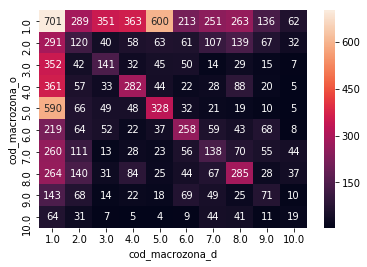

In [163]:
sns.heatmap(survey_macrozones_freqs, annot=True, fmt="d")

In [167]:
survey_macrozones_norm_freqs = survey_macrozones_freqs/survey_macrozones_freqs.values.sum()

In [169]:
survey_macrozones_norm_freqs

cod_macrozona_d,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
cod_macrozona_o,,,,,,,,,,
1.0,0.067410,0.027791,0.033753,0.034907,0.057698,0.020483,0.024137,0.025291,0.013078,0.005962
2.0,0.027983,0.011540,0.003847,0.005577,0.006058,0.005866,0.010289,0.013367,0.006443,0.003077
3.0,0.033849,0.004039,0.013559,0.003077,0.004327,0.004808,0.001346,0.002789,0.001442,0.000673
4.0,0.034715,0.005481,0.003173,0.027118,0.004231,0.002116,0.002693,0.008462,0.001923,0.000481
5.0,0.056736,0.006347,0.004712,0.004616,0.031541,0.003077,0.002019,0.001827,0.000962,0.000481
6.0,0.021060,0.006154,0.005000,0.002116,0.003558,0.024810,0.005674,0.004135,0.006539,0.000769
7.0,0.025002,0.010674,0.001250,0.002693,0.002212,0.005385,0.013271,0.006731,0.005289,0.004231
8.0,0.025387,0.013463,0.002981,0.008078,0.002404,0.004231,0.006443,0.027406,0.002693,0.003558
9.0,0.013751,0.006539,0.001346,0.002116,0.001731,0.006635,0.004712,0.002404,0.006828,0.000962


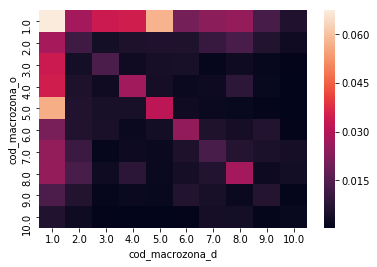

In [172]:
sns.heatmap(survey_macrozones_norm_freqs)

## Generating Survey OD Matrix for Zones

In [174]:
survey_zones_trips = bus_trips_zones.groupby(['zona_o','zona_d']).pessoa.count().reset_index(name='num_pass')

In [175]:
survey_zones_trips

,zona_o,zona_d,num_pass
0,101,101,3
1,101,102,1
2,101,103,2
3,101,104,3
4,101,301,1
5,101,302,1
6,101,303,1
7,101,321,2
8,101,341,1
9,101,362,1


In [182]:
survey_zones_freqs = survey_zones_trips.pivot(index='zona_o',columns='zona_d',values='num_pass').fillna(0)

In [183]:
survey_zones_freqs

zona_d,101,102,103,104,111,112,113,121,131,132,...,1025,1026,1027,1028,1029,1031,1041,1042,1043,1044
zona_o,,,,,,,,,,,,,,,,,,,,,
101,3.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
102,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
104,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
111,0.0,0.0,0.0,0.0,7.0,1.0,13.0,1.0,0.0,0.0,...,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113,0.0,0.0,0.0,0.0,10.0,3.0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
121,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


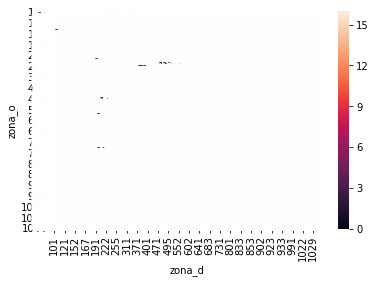

In [184]:
sns.heatmap(survey_zones_freqs, annot=True, fmt="f")

In [185]:
survey_zones_norm_freqs = survey_zones_freqs/survey_zones_freqs.values.sum()

In [186]:
survey_zones_norm_freqs

zona_d,101,102,103,104,111,112,113,121,131,132,...,1025,1026,1027,1028,1029,1031,1041,1042,1043,1044
zona_o,,,,,,,,,,,,,,,,,,,,,
101,0.000225,0.000075,0.000150,0.000225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000150,0.000000,0.000000,0.000000,0.000000
102,0.000075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
103,0.000150,0.000000,0.000075,0.000150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000075,0.000000,0.000000,0.000000,0.000000
104,0.000225,0.000000,0.000150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
111,0.000000,0.000000,0.000000,0.000000,0.000525,0.000075,0.000974,0.000075,0.000000,0.000000,...,0.000075,0.000150,0.000150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000150,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
113,0.000000,0.000000,0.000000,0.000000,0.000749,0.000225,0.000824,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
121,0.000000,0.000000,0.000000,0.000000,0.000075,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000300,0.000225,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000075


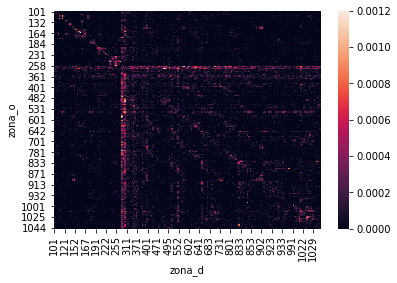

In [187]:
sns.heatmap(survey_zones_norm_freqs)

## Generating Baseline Trips dataset

### Shuffling destinations to create baseline OD Matrix

In [188]:
bus_trips_zones.head()

,pessoa,sexo,idade,cod_transp,transp,zona_o,cod_macrozona_o,municipio_o,mot_o,hora_o,zona_d,cod_macrozona_d,municipio_d,mot_d,hora_d
15562,3,Feminino,62.0,3,Onibus metropolitano,111,NaN,ARAUCÁRIA,Residencia,13:30,301,1.0,CURITIBA,Assuntos pessoais,14:20
7859,6,Masculino,22.0,1,Onibus municipio de Curitiba,451,1.0,CURITIBA,Residencia,18:00,302,1.0,CURITIBA,Escola/educacao,18:50
10471,6,Masculino,22.0,1,Onibus municipio de Curitiba,302,1.0,CURITIBA,Escola/educacao,22:30,451,1.0,CURITIBA,Residencia,23:00
22169,15,Feminino,24.0,1,Onibus municipio de Curitiba,495,3.0,CURITIBA,Residencia,12:30,303,1.0,CURITIBA,Compras,13:00
63747,15,Feminino,24.0,1,Onibus municipio de Curitiba,303,1.0,CURITIBA,Compras,17:20,495,3.0,CURITIBA,Residencia,18:00


In [189]:
dest_cols = bus_trips_zones.filter(['zona_d','cod_macrozona_d','municipio_d'])

In [233]:
dest_cols

,zona_d,cod_macrozona_d,municipio_d
15562,301,1.0,CURITIBA
7859,302,1.0,CURITIBA
10471,451,1.0,CURITIBA
22169,303,1.0,CURITIBA
63747,495,3.0,CURITIBA
26439,781,5.0,CURITIBA
44665,631,5.0,CURITIBA
15762,301,1.0,CURITIBA
33723,927,9.0,CURITIBA
33709,1023,8.0,CURITIBA


In [207]:
other_cols = bus_trips_zones.drop(dest_cols.columns, axis=1)

In [208]:
other_cols.head()

,pessoa,sexo,idade,cod_transp,transp,zona_o,cod_macrozona_o,municipio_o,mot_o,hora_o,mot_d,hora_d
15562,3,Feminino,62.0,3,Onibus metropolitano,111,NaN,ARAUCÁRIA,Residencia,13:30,Assuntos pessoais,14:20
7859,6,Masculino,22.0,1,Onibus municipio de Curitiba,451,1.0,CURITIBA,Residencia,18:00,Escola/educacao,18:50
10471,6,Masculino,22.0,1,Onibus municipio de Curitiba,302,1.0,CURITIBA,Escola/educacao,22:30,Residencia,23:00
22169,15,Feminino,24.0,1,Onibus municipio de Curitiba,495,3.0,CURITIBA,Residencia,12:30,Compras,13:00
63747,15,Feminino,24.0,1,Onibus municipio de Curitiba,303,1.0,CURITIBA,Compras,17:20,Residencia,18:00


In [203]:
np.random.seed(199)

In [235]:
shuffled_dests = dest_cols.reindex(np.random.permutation(dest_cols.index, ))

In [236]:
shuffled_dests

,zona_d,cod_macrozona_d,municipio_d
27558,501,3.0,CURITIBA
67873,131,NaN,CAMPINA GRANDE DO SUL
29176,401,1.0,CURITIBA
30293,1029,8.0,CURITIBA
9841,842,6.0,CURITIBA
12993,321,1.0,CURITIBA
9168,651,6.0,CURITIBA
46619,165,NaN,COLOMBO
20670,851,7.0,CURITIBA
20429,851,7.0,CURITIBA


In [237]:
shuffled_trips_dests = pd.concat([other_cols.reset_index(drop=True), 
                                  shuffled_dests.reset_index(drop=True)], axis=1) \
                        .filter(bus_trips_zones.columns)

### Checking if destination shuffling was performed correctly

In [238]:
shuffled_trips_dests.head()

,pessoa,sexo,idade,cod_transp,transp,zona_o,cod_macrozona_o,municipio_o,mot_o,hora_o,zona_d,cod_macrozona_d,municipio_d,mot_d,hora_d
0,3,Feminino,62.0,3,Onibus metropolitano,111,NaN,ARAUCÁRIA,Residencia,13:30,501,3.0,CURITIBA,Assuntos pessoais,14:20
1,6,Masculino,22.0,1,Onibus municipio de Curitiba,451,1.0,CURITIBA,Residencia,18:00,131,NaN,CAMPINA GRANDE DO SUL,Escola/educacao,18:50
2,6,Masculino,22.0,1,Onibus municipio de Curitiba,302,1.0,CURITIBA,Escola/educacao,22:30,401,1.0,CURITIBA,Residencia,23:00
3,15,Feminino,24.0,1,Onibus municipio de Curitiba,495,3.0,CURITIBA,Residencia,12:30,1029,8.0,CURITIBA,Compras,13:00
4,15,Feminino,24.0,1,Onibus municipio de Curitiba,303,1.0,CURITIBA,Compras,17:20,842,6.0,CURITIBA,Residencia,18:00


In [247]:
bus_trips_zones.head()

,pessoa,sexo,idade,cod_transp,transp,zona_o,cod_macrozona_o,municipio_o,mot_o,hora_o,zona_d,cod_macrozona_d,municipio_d,mot_d,hora_d
15562,3,Feminino,62.0,3,Onibus metropolitano,111,NaN,ARAUCÁRIA,Residencia,13:30,301,1.0,CURITIBA,Assuntos pessoais,14:20
7859,6,Masculino,22.0,1,Onibus municipio de Curitiba,451,1.0,CURITIBA,Residencia,18:00,302,1.0,CURITIBA,Escola/educacao,18:50
10471,6,Masculino,22.0,1,Onibus municipio de Curitiba,302,1.0,CURITIBA,Escola/educacao,22:30,451,1.0,CURITIBA,Residencia,23:00
22169,15,Feminino,24.0,1,Onibus municipio de Curitiba,495,3.0,CURITIBA,Residencia,12:30,303,1.0,CURITIBA,Compras,13:00
63747,15,Feminino,24.0,1,Onibus municipio de Curitiba,303,1.0,CURITIBA,Compras,17:20,495,3.0,CURITIBA,Residencia,18:00


In [246]:
pd.concat([shuffled_trips_dests.filter(dest_cols.columns),
           bus_trips_zones.filter(dest_cols.columns)]) \
    .drop_duplicates(keep=False)

,zona_d,cod_macrozona_d,municipio_d


## Generating Baseline OD Matrix for Macrozones

In [248]:
baseline_macrozones_trips = shuffled_trips_dests.groupby(['cod_macrozona_o','cod_macrozona_d']).pessoa.count().reset_index(name='num_pass')

In [249]:
baseline_macrozones_trips

,cod_macrozona_o,cod_macrozona_d,num_pass
0,1.0,1.0,1077
1,1.0,2.0,289
2,1.0,3.0,227
3,1.0,4.0,301
4,1.0,5.0,374
5,1.0,6.0,241
6,1.0,7.0,247
7,1.0,8.0,320
8,1.0,9.0,129
9,1.0,10.0,77


In [250]:
baseline_macrozones_freqs = baseline_macrozones_trips.pivot(index='cod_macrozona_o',columns='cod_macrozona_d',values='num_pass')

In [251]:
baseline_macrozones_freqs

cod_macrozona_d,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
cod_macrozona_o,,,,,,,,,,
1.0,1077,289,227,301,374,241,247,320,129,77
2.0,312,98,50,70,102,73,74,104,33,16
3.0,223,61,49,55,83,54,38,58,30,11
4.0,263,73,79,74,124,69,57,85,42,23
5.0,352,110,70,122,113,86,89,103,56,28
6.0,270,79,55,66,76,70,54,54,35,15
7.0,237,77,46,65,72,49,47,67,40,14
8.0,288,84,60,93,124,60,59,74,36,22
9.0,138,46,31,28,43,30,45,34,19,9


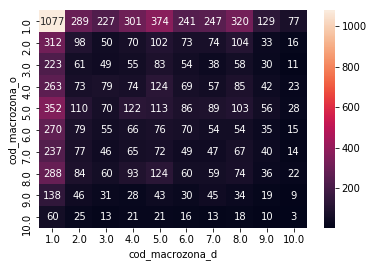

In [253]:
sns.heatmap(baseline_macrozones_freqs, annot=True, fmt="d")

In [254]:
baseline_macrozones_norm_freqs = baseline_macrozones_freqs/baseline_macrozones_freqs.values.sum()

In [255]:
baseline_macrozones_norm_freqs

cod_macrozona_d,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
cod_macrozona_o,,,,,,,,,,
1.0,0.108733,0.029177,0.022918,0.030389,0.037759,0.024331,0.024937,0.032307,0.013024,0.007774
2.0,0.031499,0.009894,0.005048,0.007067,0.010298,0.007370,0.007471,0.010500,0.003332,0.001615
3.0,0.022514,0.006159,0.004947,0.005553,0.008380,0.005452,0.003836,0.005856,0.003029,0.001111
4.0,0.026552,0.007370,0.007976,0.007471,0.012519,0.006966,0.005755,0.008582,0.004240,0.002322
5.0,0.035538,0.011106,0.007067,0.012317,0.011408,0.008682,0.008985,0.010399,0.005654,0.002827
6.0,0.027259,0.007976,0.005553,0.006663,0.007673,0.007067,0.005452,0.005452,0.003534,0.001514
7.0,0.023927,0.007774,0.004644,0.006562,0.007269,0.004947,0.004745,0.006764,0.004038,0.001413
8.0,0.029076,0.008481,0.006058,0.009389,0.012519,0.006058,0.005957,0.007471,0.003635,0.002221
9.0,0.013932,0.004644,0.003130,0.002827,0.004341,0.003029,0.004543,0.003433,0.001918,0.000909


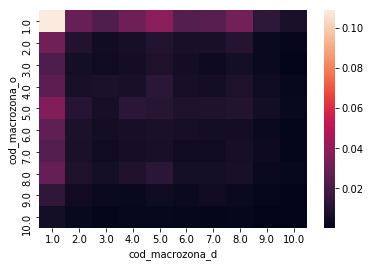

In [256]:
sns.heatmap(baseline_macrozones_norm_freqs)

## Generating Baseline OD Matrix for Zones

In [258]:
baseline_zones_trips = shuffled_trips_dests.groupby(['zona_o','zona_d']).pessoa.count().reset_index(name='num_pass')

In [259]:
baseline_zones_trips

,zona_o,zona_d,num_pass
0,101,111,1
1,101,131,1
2,101,152,1
3,101,165,1
4,101,182,1
5,101,212,1
6,101,253,1
7,101,258,1
8,101,301,3
9,101,302,2


In [260]:
baseline_zones_freqs = baseline_zones_trips.pivot(index='zona_o',columns='zona_d',values='num_pass').fillna(0)

In [261]:
baseline_zones_freqs

zona_d,101,102,103,104,111,112,113,121,131,132,...,1025,1026,1027,1028,1029,1031,1041,1042,1043,1044
zona_o,,,,,,,,,,,,,,,,,,,,,
101,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
104,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
111,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0
121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


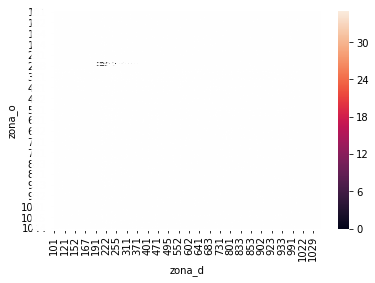

In [262]:
sns.heatmap(baseline_zones_freqs, annot=True, fmt="f")

In [185]:
baseline_zones_norm_freqs = baseline_zones_freqs/baseline_zones_freqs.values.sum()

In [186]:
survey_zones_norm_freqs

zona_d,101,102,103,104,111,112,113,121,131,132,...,1025,1026,1027,1028,1029,1031,1041,1042,1043,1044
zona_o,,,,,,,,,,,,,,,,,,,,,
101,0.000225,0.000075,0.000150,0.000225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000150,0.000000,0.000000,0.000000,0.000000
102,0.000075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
103,0.000150,0.000000,0.000075,0.000150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000075,0.000000,0.000000,0.000000,0.000000
104,0.000225,0.000000,0.000150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
111,0.000000,0.000000,0.000000,0.000000,0.000525,0.000075,0.000974,0.000075,0.000000,0.000000,...,0.000075,0.000150,0.000150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000150,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
113,0.000000,0.000000,0.000000,0.000000,0.000749,0.000225,0.000824,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
121,0.000000,0.000000,0.000000,0.000000,0.000075,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000300,0.000225,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000075


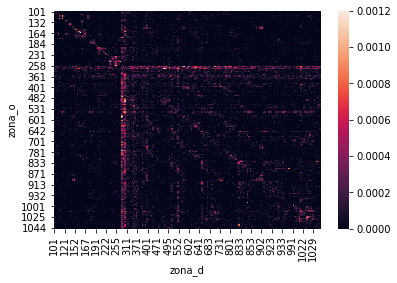

In [187]:
sns.heatmap(survey_zones_norm_freqs)